In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Datos/' # carpeta LOCAL donde se encuentran los datasets

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

nomArch = DATOS_DIR + 'Premios2020.csv'
#-- detectando la codificación de caracteres usada ----
with open(nomArch, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df= pd.read_csv(nomArch, encoding=result['encoding'])
df.head()

,Year,Age,Actor,Sex,Film,nominations,rating,duration,genre1,genre2,release,synopsis
0,1928,44,Emil Jannings,M,The Last Command,2.0,8.0,88,Drama,History,April,A former Imperial Russian general and cousin o...
1,1928,22,Laura Gainor (aka Janet Gaynor),F,Sunrise,5.0,7.8,110,Drama,Romance,NaN,A street cleaner saves a young womans life and...
2,1929,37,Mary Pickford,F,Coquette,1.0,7.3,76,Drama,Romance,April,A flirtatious southern belle is compromised wi...
3,1929,38,Warner Baxter,M,In Old Arizona,5.0,5.8,95,Romance,Western,January,A charming happy-go-lucky bandit in old Arizon...
4,1930,62,George Arliss,M,Disraeli,3.0,6.5,90,Biography,Drama,November,Prime Minister of Great Britain Benjamin Disra...


**Normalización lineal uniforme**

In [3]:
# -- Escala los valores entre 0 y 1 --
mini = df['Age'].min()
maxi = df['Age'].max()
df['AgeLineal']= (df['Age']-mini)/(maxi-mini)

df[['Age', 'AgeLineal']].describe()

,Age,AgeLineal
count,186.000000,186.000000
mean,40.365591,0.312348
std,11.437052,0.184469
min,21.000000,0.000000
25%,32.250000,0.181452
50%,38.000000,0.274194
75%,45.750000,0.399194
max,83.000000,1.000000


**Normalización usando media y desvío**

In [4]:
# -- Estandarización --
media = df['Age'].mean()
desvio = df['Age'].std()
df['AgeNorm']= (df['Age']-media)/desvio

round(df[['Age', 'AgeLineal', 'AgeNorm']].describe(),4)

,Age,AgeLineal,AgeNorm
count,186.0000,186.0000,186.0000
mean,40.3656,0.3123,-0.0000
std,11.4371,0.1845,1.0000
min,21.0000,0.0000,-1.6932
25%,32.2500,0.1815,-0.7096
50%,38.0000,0.2742,-0.2068
75%,45.7500,0.3992,0.4708
max,83.0000,1.0000,3.7277


<Figure size 640x480 with 0 Axes>

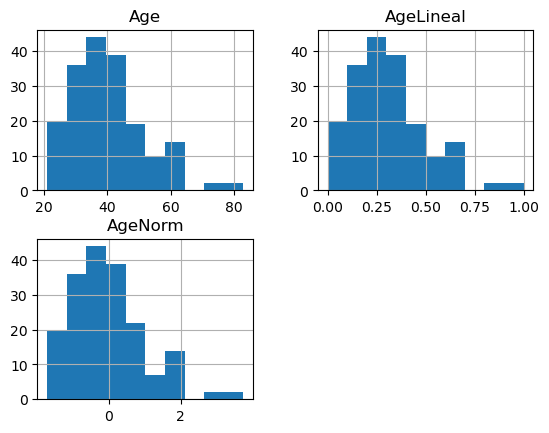

In [5]:
plt.figure()
df[['Age','AgeLineal','AgeNorm']].hist()
plt.show()

In [6]:
# -- elegimos algunas columnas numéricas

seleccion = df[["Year", "Age", "nominations", "rating", "duration"]]
seleccion


,Year,Age,nominations,rating,duration
0,1928,44,2.0,8.0,88
1,1928,22,5.0,7.8,110
2,1929,37,1.0,7.3,76
3,1929,38,5.0,5.8,95
4,1930,62,3.0,6.5,90
...,...,...,...,...,...
181,2018,44,10.0,7.5,119
182,2019,50,2.0,6.8,118
183,2019,45,11.0,8.5,122
184,2020,63,6.0,7.4,108


**Normalización lineal de los atributos seleccionados**

In [7]:
df['AgeLineal']= (df['Age']-mini)/(maxi-mini)

mini = seleccion.min()
maxi = seleccion.max()
seleccionNormLineal= (seleccion-mini)/(maxi-mini)
round(seleccionNormLineal,3)

,Year,Age,nominations,rating,duration
0,0.000,0.371,0.083,0.647,0.112
1,0.000,0.016,0.333,0.588,0.243
2,0.011,0.258,0.000,0.441,0.041
3,0.011,0.274,0.333,0.000,0.154
4,0.022,0.661,0.167,0.206,0.124
...,...,...,...,...,...
181,0.978,0.371,0.750,0.500,0.296
182,0.989,0.468,0.083,0.294,0.290
183,0.989,0.387,0.833,0.794,0.314
184,1.000,0.677,0.417,0.471,0.231


**Normalización de los atributos seleccionados utilizando media y desvío**

In [8]:
media = seleccion.mean()
desvio = seleccion.std()
seleccionNorm= (seleccion-media)/desvio
round(seleccionNorm,3)

,Year,Age,nominations,rating,duration
0,-1.709,0.318,-1.433,0.622,-1.302
1,-1.709,-1.606,-0.423,0.242,-0.386
2,-1.672,-0.294,-1.769,-0.710,-1.802
3,-1.672,-0.207,-0.423,-3.567,-1.010
4,-1.635,1.892,-1.096,-2.234,-1.219
...,...,...,...,...,...
181,1.635,0.318,1.259,-0.330,-0.011
182,1.672,0.842,-1.433,-1.663,-0.052
183,1.672,0.405,1.595,1.574,0.114
184,1.709,1.979,-0.087,-0.520,-0.469
